In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Считывание данных из файла
df = pd.read_csv('data.csv', decimal=',')
df.drop('A', axis=1, inplace=True)
df = df.sort_values(by='B').reset_index(drop=True)
B = df['B'].to_numpy()
Y = df['response'].to_numpy() # матрица наблбдаемых значений отклика
df

,B,response
0,1,0.77
1,1,2.10
2,1,2.22
3,1,0.95
4,1,2.85
5,1,4.00
6,1,3.21
7,1,0.47
8,1,3.75
9,2,2.37


$$
\text{Ограничение на параметры модели: }
$$
$$
\sum_{i=1}^k \alpha_i = 0,
$$
$$
\text{где } \alpha_i \text{ — эффект i-го уровня фактора.}
$$

$$
Y = X \Theta + \varepsilon,
$$

где:
- $Y$ — матрица размеров $n \times 1$ наблюдаемых значений отклика ($n = \sum_{i=1}^k n_i$),
- $\varepsilon$ — матрица размеров $n \times 1$ случайных ошибок $\xi_{ij}$,
- $\Theta$ — матрица размеров $(k+1) \times 1$ коэффициентов $\theta_0, \alpha_1, \cdots, \alpha_k$,
- $X$ — матрица размеров $n \times (k+1)$ значений факторов $x_0, x_1, \cdots, x_k$

$$
X = (x_0 \, x_1 \, x_2 \, {...} \, x_k) =
\begin{pmatrix}
1 & 1 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots \\
1 & 1 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots \\
1 & 0 & 0 & 1 \\
\vdots & \vdots & \vdots & \vdots \\
1 & 0 & 0 & 1
\end{pmatrix},
\quad \Theta =
\begin{pmatrix}
\theta_0 \\
\alpha_1 \\
\alpha_2 \\
\vdots \\
\alpha_k
\end{pmatrix}
$$

$$
\text{В соответствии с ограничением: }
$$

$$
\sum_{i=1}^k \alpha_i = 0
\text{(что соответствует } \theta_0 = \frac{1}{k} \sum_{i=1}^k \theta_i {).}
$$

Матрицу значений факторов $X_2$, соответствующую данному ограничению, можно получить следующим образом.

Пусть:
- $x_i,\ i = 0,\ldots,k+1$ - столбцы матрицы $X$
- $\widetilde{x}_i,\ i = 0,\ldots,k$ - столбцы матрицы $X_2$

Тогда:
$$
\widetilde{x}_0 = x_0,\quad \widetilde{x}_i = x_i - x_{i+1},\ i = 1,\ldots,k.
$$

Исследуем влияние на среднее значение результирующего показателя фактора B.

In [ ]:
# Построим первоначальную матрицу X
X_init = np.zeros([len(B), 4])
counts = np.bincount(B) # считает, сколько раз каждое из целых значений входит в массив
# Заполнение нулевого столбца
for row in X_init:
  row[0] = 1
# Заполнение первого столбца
for row in X_init[:counts[1]]:
  row[1] = 1
# Заполнение второго столбца
for row in X_init[counts[1]:counts[1]+counts[2]]:
  row[2] = 1
# Заполнение третьего столбца
for row in X_init[counts[1]+counts[2]:]:
  row[3] = 1
X_init

array([[1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.]])

In [ ]:
# Построим матрицу X_2 c учётом ограничений
X_2 = np.zeros([len(B), 3])
# Заполнение нулевого столбца
for row in X_2:
  row[0] = 1
# Заполнение первого столбца
for row_num in range(len(X_init)):
  X_2[row_num][1] = X_init[row_num][1] - X_init[row_num][2]
# Заполнение второго столбца
for row_num in range(len(X_init)):
  X_2[row_num][2] = X_init[row_num][2] - X_init[row_num][3]
X_2

array([[ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1., -1.,  1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

Проводим регрессионный анализ с полученной матрицей полного ранга $X_2$ и соответствующим вектором значений отклика $Y$, и делаем вывод о значимости регрессионной модели.

Нахождение вектора оценок параметров регрессии:
$$
\hat{B} = K^{-1}Z,
$$

где:

$$
K = X^TX, \quad Z = X^TY,
$$

$$
X =
\begin{pmatrix}
1 & x_1^{(1)} & \cdots & x_k^{(1)} \\
1 & x_1^{(2)} & \cdots & x_k^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & \cdots & x_k^{(n)}
\end{pmatrix}
=
\begin{pmatrix}
1 & \varphi_1(x_1) & \cdots & \varphi_k(x_1) \\
1 & \varphi_1(x_2) & \cdots & \varphi_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
1 & \varphi_1(x_n) & \cdots & \varphi_k(x_n)
\end{pmatrix}, \quad
Y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

In [ ]:
# Функция для нахождения оценки параметров уравнения множественной линейной регрессии
def mul_linear_reg_params(X, Y):
  K = X.T @ X
  Z = X.T @ Y
  res = np.linalg.inv(K) @ Z
  return res

B_p = mul_linear_reg_params(X_2, Y) # Вектор оценок параметров уравнения линейной регрессии
print(f'Уравнение соответствующей регрессионной модели: y = {round(B_p[0], 2)} + {round(B_p[1], 2)}*x1 + {round(B_p[2], 2)}*x2')

Уравнение соответствующей регрессионной модели: y = 1.32 + 0.94*x1 + 1.68*x2


Проверим, выполняются ли основные предположения дисперсионного анализа (нормальность остатков и однородность дисперсий для различных уровней фактора).

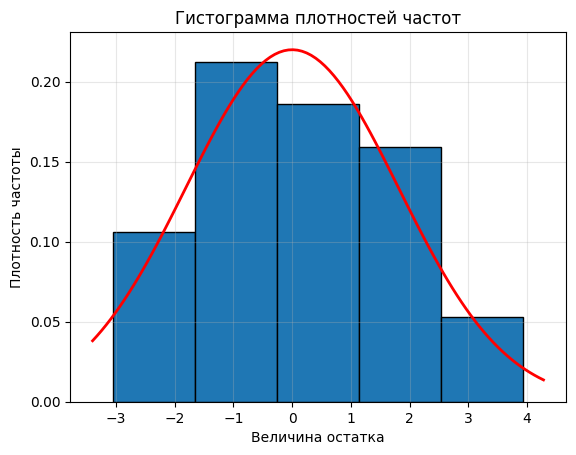

In [ ]:
# Исследование свойств остатков модели линейной регрессии
residuals_vec = [(Y[i] - (B_p[2]*X_2[i][2] + B_p[1]*X_2[i][1] + B_p[0]*X_2[i][0])) for i in range(len(Y))]

# Найдем оценки параметров нормального распределения
res_mean = sum(residuals_vec)/len(residuals_vec)
res_disp = sum([(residuals_vec[i] - res_mean)**2 for i in range(len(residuals_vec))])/(len(residuals_vec)-1)

# Построение гистограммы
plt.hist(residuals_vec, bins=int(1 + np.log2(len(residuals_vec))), density=True, edgecolor='black')
plt.title('Гистограмма плотностей частот')
plt.xlabel('Величина остатка')
plt.ylabel('Плотность частоты')
plt.grid(True, alpha=0.3)

# Наложение графика плотности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, res_mean, res_disp**0.5)
plt.plot(x, p, 'r', linewidth=2)

Визуально гистограмма остатков хорошо согласуется с кривой плотности нормального распределения.

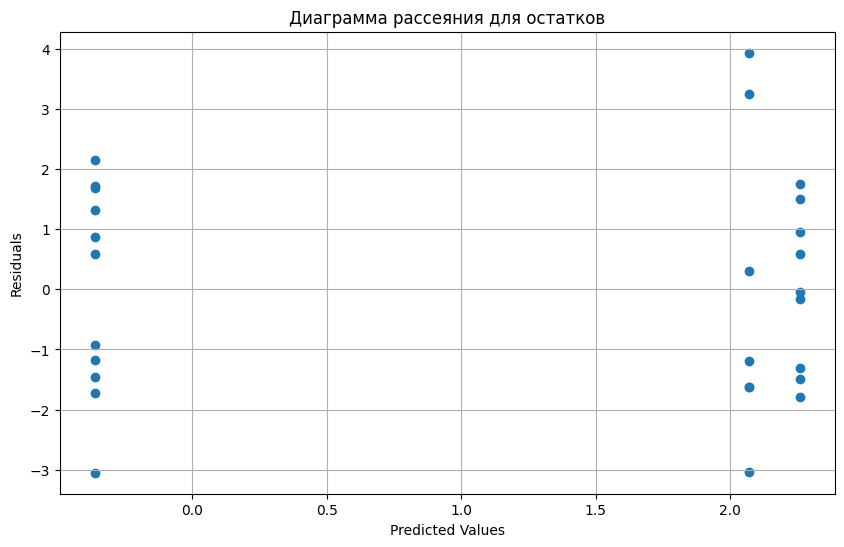

In [ ]:
# Исследование однородности остатков (гомоскедастичности)
# Отображение диаграммы рассеяния
predicted_values = [(B_p[2]*X_2[i][2] + B_p[1]*X_2[i][1] + B_p[0]*X_2[i][0]) for i in range(len(Y))]
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals_vec)
plt.title('Диаграмма рассеяния для остатков')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

Из приведенной диаграммы можно сделать вывод о достаточной однородности разброса остатков, то есть можно считать, что остатки гомоскедастичны.

$$
\text{Оценка коэффициента детерминации:}
$$

$$
\hat{R}^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

$$
\text{Cтатистика Фишера:}
$$
$$
F = \frac{n - k - 1}{k} \frac{\sum_{i=1}^{n} (\hat{y}(x_i) - \bar{y})^2}{\sum_{i=1}^{n} (\hat{y}(x_i) - y_i)^2} = \frac{n - k - 1}{k} \frac{\hat{R}^2}{1 - \hat{R}^2}
$$

In [ ]:
# Оценка коэффициента детерминации
est_coef_det_lin = 1 - sum([(Y[i] - (B_p[2]*X_2[i][2] + B_p[1]*X_2[i][1] + B_p[0]*X_2[i][0]))**2 for i in range(len(Y))])/sum([(Y[i] - sum(Y)/len(Y))**2 for i in range(len(Y))])

print(f'Оценка коэффициента детерминации: {est_coef_det_lin}')

# Статистика Фишера
F = ((len(Y)-3)/2)*(est_coef_det_lin/(1-est_coef_det_lin))
print(f'Статистика Фишера: {F}')

Оценка коэффициента детерминации: 0.3295841581990162
Статистика Фишера: 5.899338368502125


$$
\text{При } \alpha = 0.05
$$

$$
F_{\text{крит}} = 3{,}40282610
$$

$$
\text{Значение статистики Фишера для линейной регрессии больше } F_{\text{крит}}
$$

$$
\text{=> Соотвествующая регрессионная модель является значимой.}
$$

Таким образом, эффект фактора - значим.

Проведем анализ значимости попарных различий средних значений отклика для различных уровней фактора.

**Метод множественных сравнений Шеффе**

Для проверки гипотезы равенства средних $\mu_i$ и $\mu_j$ используется статистика:

$$F = \frac{\left( \overline{y}_i - \overline{y}_j \right)^2}{v_1 \, MS_R (1/n_i + 1/n_j)},$$

где:
- $MS_R$ – оценка внутригрупповой (остаточной) дисперсии, полученная в ходе дисперсионного анализа
- $\overline{y}_i$, $\overline{y}_j$ – выборочные средние для групп $i$ и $j$
- $n_i$, $n_j$ – размеры групп $i$ и $j$
- $v_1$ – число степеней свободы для фактора

Если наблюдаемое значение статистики $F_{\text{набл}} \geq F_{\text{кр}}$, то гипотеза о равенстве средних отвергается.

$$
\text{При } \alpha = 0.05
$$

$$
F_{\text{крит}} = 4{,}2416
$$

In [ ]:
n1 = counts[1]
n2 = counts[2]
n3 = counts[3]
mean_1 = sum(Y[:n1])/n1
mean_2 = sum(Y[n1:n1+n2])/n2
mean_3 = sum(Y[n1+n2:])/n3

SSR = sum([(yij - mean_1)**2 for yij in Y[:n1]]) + sum([(yij - mean_2)**2 for yij in Y[n1:n1+n2]]) + sum([(yij - mean_3)**2 for yij in Y[n1+n2:]])
MSR = SSR/25

F_1_2 = (mean_1 - mean_2)**2/(MSR*(1/n1+1/n2))
F_1_3 = (mean_1 - mean_3)**2/(MSR*(1/n1+1/n3))
F_2_3 = (mean_2 - mean_3)**2/(MSR*(1/n2+1/n3))

print(f'Статистика Фишера для уровней 1, 2: {F_1_2}')
print(f'Статистика Фишера для уровней 1, 3: {F_1_3}')
print(f'Статистика Фишера для уровней 2, 3: {F_2_3}')


Статистика Фишера для уровней 1, 2: 0.04055135847029673
Статистика Фишера для уровней 1, 3: 9.914453731713095
Статистика Фишера для уровней 2, 3: 7.383327047692096


Таким образом, принимаем гипотезу о равенстве средних групп 1 и 2, и отвергаем гипотезу о равенстве средних следующих групп: 1 и 3, 2 и 3.

**Вывод**

В ходе данной лабораторной работы был проведен однофакторный дисперсионный анализ посредством построения соответствующей линейной модели и оценки ее значимости. Построенная модель оказалась значимой, а соответственно и рассматриваемый эффект фактора также был признан значимым. Анализ значимости попарных различий средних значений отклика для различных уровней фактора показал, что между 1-м и 2-м уровнями различий в средних значениях нет, однако гипотеза о равенстве среднего значения 3-й группы средним значениям первых двух групп была отклонена.